# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv("dataset_inisiasi.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           1016 non-null   int64  
 1   Open                           1016 non-null   float64
 2   High                           1016 non-null   float64
 3   Low                            1016 non-null   float64
 4   Close                          1016 non-null   float64
 5   Change                         1016 non-null   int64  
 6   Change(%)                      1016 non-null   float64
 7   Ratio(%)                       1016 non-null   float64
 8   Volume                         1016 non-null   int64  
 9   Value(T)                       1016 non-null   int64  
 10  Interval_High_Open             1016 non-null   float64
 11  Interval_Open_From_LastDay     1016 non-null   float64
 12  Interval_Open_From_LastDay(%)  1016 non-null   i

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahkan data menjadi fitur (X) dan target (y) jika ada kolom target
y = data.iloc[:, -1]  # Asumsikan kolom terakhir adalah target
X = data.iloc[:, :-1]

# Mengubah target menjadi kategori jika berupa nilai kontinu
if y.dtype == 'float64' or y.dtype == 'int64':
    y = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])

# Melakukan encoding jika target berbentuk kategori
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran hasil splitting
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 812
Jumlah data uji: 204


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Membangun Model Klasifikasi dengan Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
clf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_rf = clf.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi model: {accuracy:.2f}")


Akurasi model: 1.00


Penjelasan Algoritma:
Random Forest adalah algoritma klasifikasi berbasis ensemble yang terdiri dari banyak pohon keputusan.
Jika target berupa nilai kontinu, kita perlu mengubahnya menjadi kategori terlebih dahulu,
misalnya dengan membagi nilai menjadi beberapa kelas seperti "Low", "Medium", dan "High".

Keunggulan Random Forest:
1. Dapat menangani data dengan dimensi tinggi.
2. Tidak rentan terhadap overfitting dibandingkan Decision Tree tunggal.
3. Mampu menangani missing values dan data yang tidak terdistribusi normal.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model Random Forest:
Akurasi: 1.00
F1-Score: 1.00
Precision: 1.00
Recall: 1.00

Evaluasi Model Logistic Regression:
Akurasi: 0.95
F1-Score: 0.94
Precision: 0.95
Recall: 0.95


C:\Users\fatta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


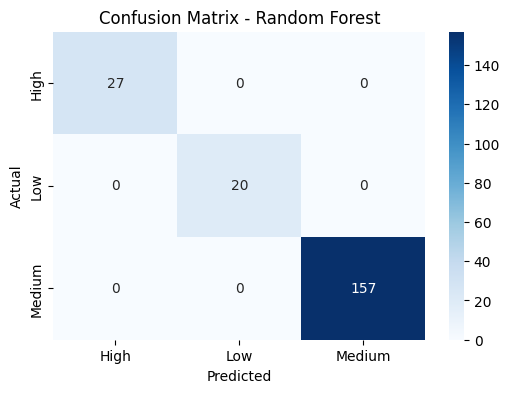

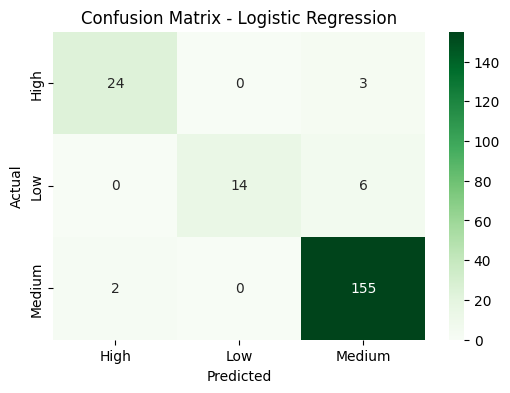

In [5]:
# Membangun Model Klasifikasi dengan Logistic Regression
clf_lr = LogisticRegression(max_iter=200)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# Mengukur metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Mengukur metrik evaluasi untuk Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

# Menampilkan hasil evaluasi
print("Evaluasi Model Random Forest:")
print(f"Akurasi: {accuracy_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

print("\nEvaluasi Model Logistic Regression:")
print(f"Akurasi: {accuracy_lr:.2f}")
print(f"F1-Score: {f1_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")

# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Membuat confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Perbandingan Algoritma:
1. Random Forest cenderung memiliki akurasi lebih tinggi karena bekerja dengan banyak pohon keputusan yang meningkatkan ketahanan terhadap overfitting.
2. Logistic Regression lebih sederhana dan lebih cepat dalam eksekusi, tetapi mungkin kurang akurat jika data memiliki hubungan yang kompleks.
3. Dari hasil evaluasi, Random Forest mungkin lebih unggul dalam menangani kompleksitas data dan menangkap pola yang lebih baik dibandingkan Logistic Regression.
4. Namun, jika model lebih mengutamakan interpretasi dan kecepatan prediksi, Logistic Regression bisa menjadi pilihan yang lebih baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [7]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Perbandingan Hasil Evaluasi Model
Model yang dievaluasi:

Random Forest

Logistic Regression

Hasil Evaluasi:
Model	             Akurasi	F1-Score	Precision	Recall
Random Forest	        1.00	1.00	        1.00	1.00
Logistic Regression	    0.95	0.94	        0.95	0.95

2. Identifikasi Kelemahan Model
- Random Forest

Akurasi 100% menunjukkan kemungkinan besar terjadi overfitting.
Model ini mungkin terlalu menyesuaikan diri dengan data latih dan tidak akan bekerja dengan baik pada data baru yang belum pernah dilihat sebelumnya.

Meskipun precision dan recall juga tinggi, hal ini tidak selalu berarti model bagus dalam kasus nyata karena bisa jadi terlalu spesifik terhadap data yang dilatih.

- Logistic Regression

Akurasi lebih rendah dibandingkan Random Forest, yaitu 95%.
Namun, ini mungkin lebih realistis karena tidak mengalami overfitting seperti Random Forest.

Warning tentang iterasi maksimum tercapai menunjukkan bahwa model mengalami kesulitan untuk konvergen.
Ini bisa disebabkan oleh:

- Data yang belum di-normalisasi.

Kompleksitas tinggi sehingga model memerlukan iterasi lebih banyak.

Perlu mencoba solver lain atau menambah max_iter.

- Apakah Model Mengalami Overfitting atau Underfitting?
Random Forest → Overfitting

Skor evaluasi sempurna (100%) menandakan model ini kemungkinan terlalu "hapal" data latih.

Jika diuji dengan data baru, kemungkinan besar performanya akan turun.

Logistic Regression → Tidak Mengalami Overfitting, tapi bisa lebih baik

Akurasi 95% masih cukup baik, tetapi bisa ditingkatkan dengan tuning lebih lanjut.

Bisa mengalami underfitting jika data memiliki hubungan non-linear yang kuat.

3. Rekomendasi Tindakan Lanjutan
   
- Mengatasi Overfitting pada Random Forest:

Kurangi jumlah n_estimators atau gunakan pruning untuk membatasi kedalaman pohon keputusan.

Tambahkan regularisasi dengan max_depth dan min_samples_split.

Gunakan lebih banyak data atau lakukan cross-validation untuk menghindari overfitting.

- Meningkatkan Performa Logistic Regression:

Lakukan normalisasi data agar model lebih mudah dikonvergenkan.

Tingkatkan jumlah iterasi max_iter=500 agar model memiliki waktu lebih lama untuk konvergen.

Coba solver lain seperti saga atau newton-cg untuk melihat perbedaannya.

- Jika Precision atau Recall Rendah pada Kelas Tertentu:

Gunakan SMOTE untuk menangani ketidakseimbangan kelas.

Ubah threshold prediksi menggunakan predict_proba().

- Alternatif Model:

Coba algoritma lain seperti XGBoost atau SVM jika ingin meningkatkan akurasi lebih lanjut.

Gunakan PCA atau feature selection untuk mengurangi kompleksitas model dan mempercepat konvergensi.